<a href="https://colab.research.google.com/github/rwiddhi-b/CodeClause_genderAgeDetection/blob/main/Gender_Age_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import numpy as np #Numerical Python -> Mathematical Operation
import pandas as pd #Data Manipulation
import os #File Processing
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization
import warnings
from tqdm.notebook import tqdm # for getting loading screen or the progress bar
warnings.filterwarnings('ignore') #For clean results

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D,Input

In [ ]:
!pip install opendatasets #For getting dataset

import opendatasets as od

#Downloading DataSet
od.download("https://www.kaggle.com/datasets/jangedoo/utkface-new")

"""#Load the Dataset"""

BASE_DIR='/content/utkface-new/UTKFace' #To load Data


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rwiddhibhowmik
Your Kaggle Key: ··········


100%|██████████| 331M/331M [00:02<00:00, 167MB/s]


In [ ]:
image_paths=[]
age_labels=[]
gender_labels=[]

for filename in tqdm(os.listdir(BASE_DIR)): #iterate all the filees in directory
  image_path=os.path.join(BASE_DIR,filename) #combining BASE_DIR and filename
  temp=filename.split('_') #Splitting filename into multiple paths
  age=int(temp[0])
  gender=int(temp[1])
  image_paths.append(image_path) #Adding image_path in image_paths list
  age_labels.append(age) #adding age in age_labels list
  gender_labels.append(gender) #adding gender in gender_labels list


  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
#Convert to DataFrame
df=pd.DataFrame()
#Three Columns that we need
df['image'],df['age'],df['gender']=image_paths,age_labels,gender_labels

df.head() #Viewing the first 5 datapoints

,image,age,gender
0,/content/utkface-new/UTKFace/53_0_3_2017010914...,53,0
1,/content/utkface-new/UTKFace/74_1_1_2017012022...,74,1
2,/content/utkface-new/UTKFace/62_0_0_2017011120...,62,0
3,/content/utkface-new/UTKFace/26_1_2_2017011618...,26,1
4,/content/utkface-new/UTKFace/26_0_1_2017011315...,26,0


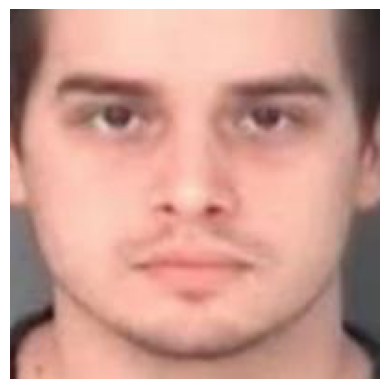

In [ ]:
#Map Labels for Gender
gender_dict={0:'Male',1:'Female'}

"""#Exploratory Data Analysis"""

from PIL import Image #To display Image
img=Image.open(df['image'][9]) #10th image
plt.axis('off') #Remove axis
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

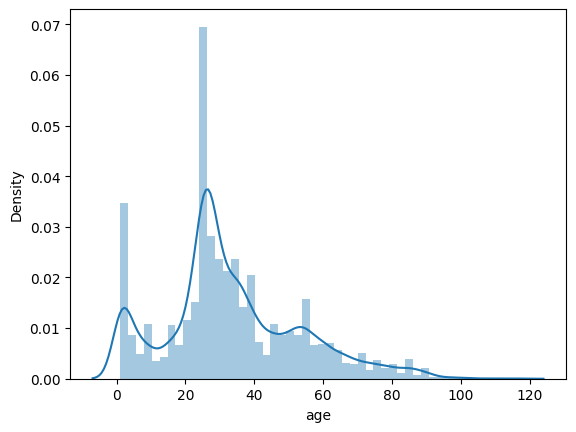

In [ ]:
sns.distplot(df['age']) #Age Distribution

In [ ]:
df['gender'].value_counts() #Count of each Category

0    12391
1    11317
Name: gender, dtype: int64

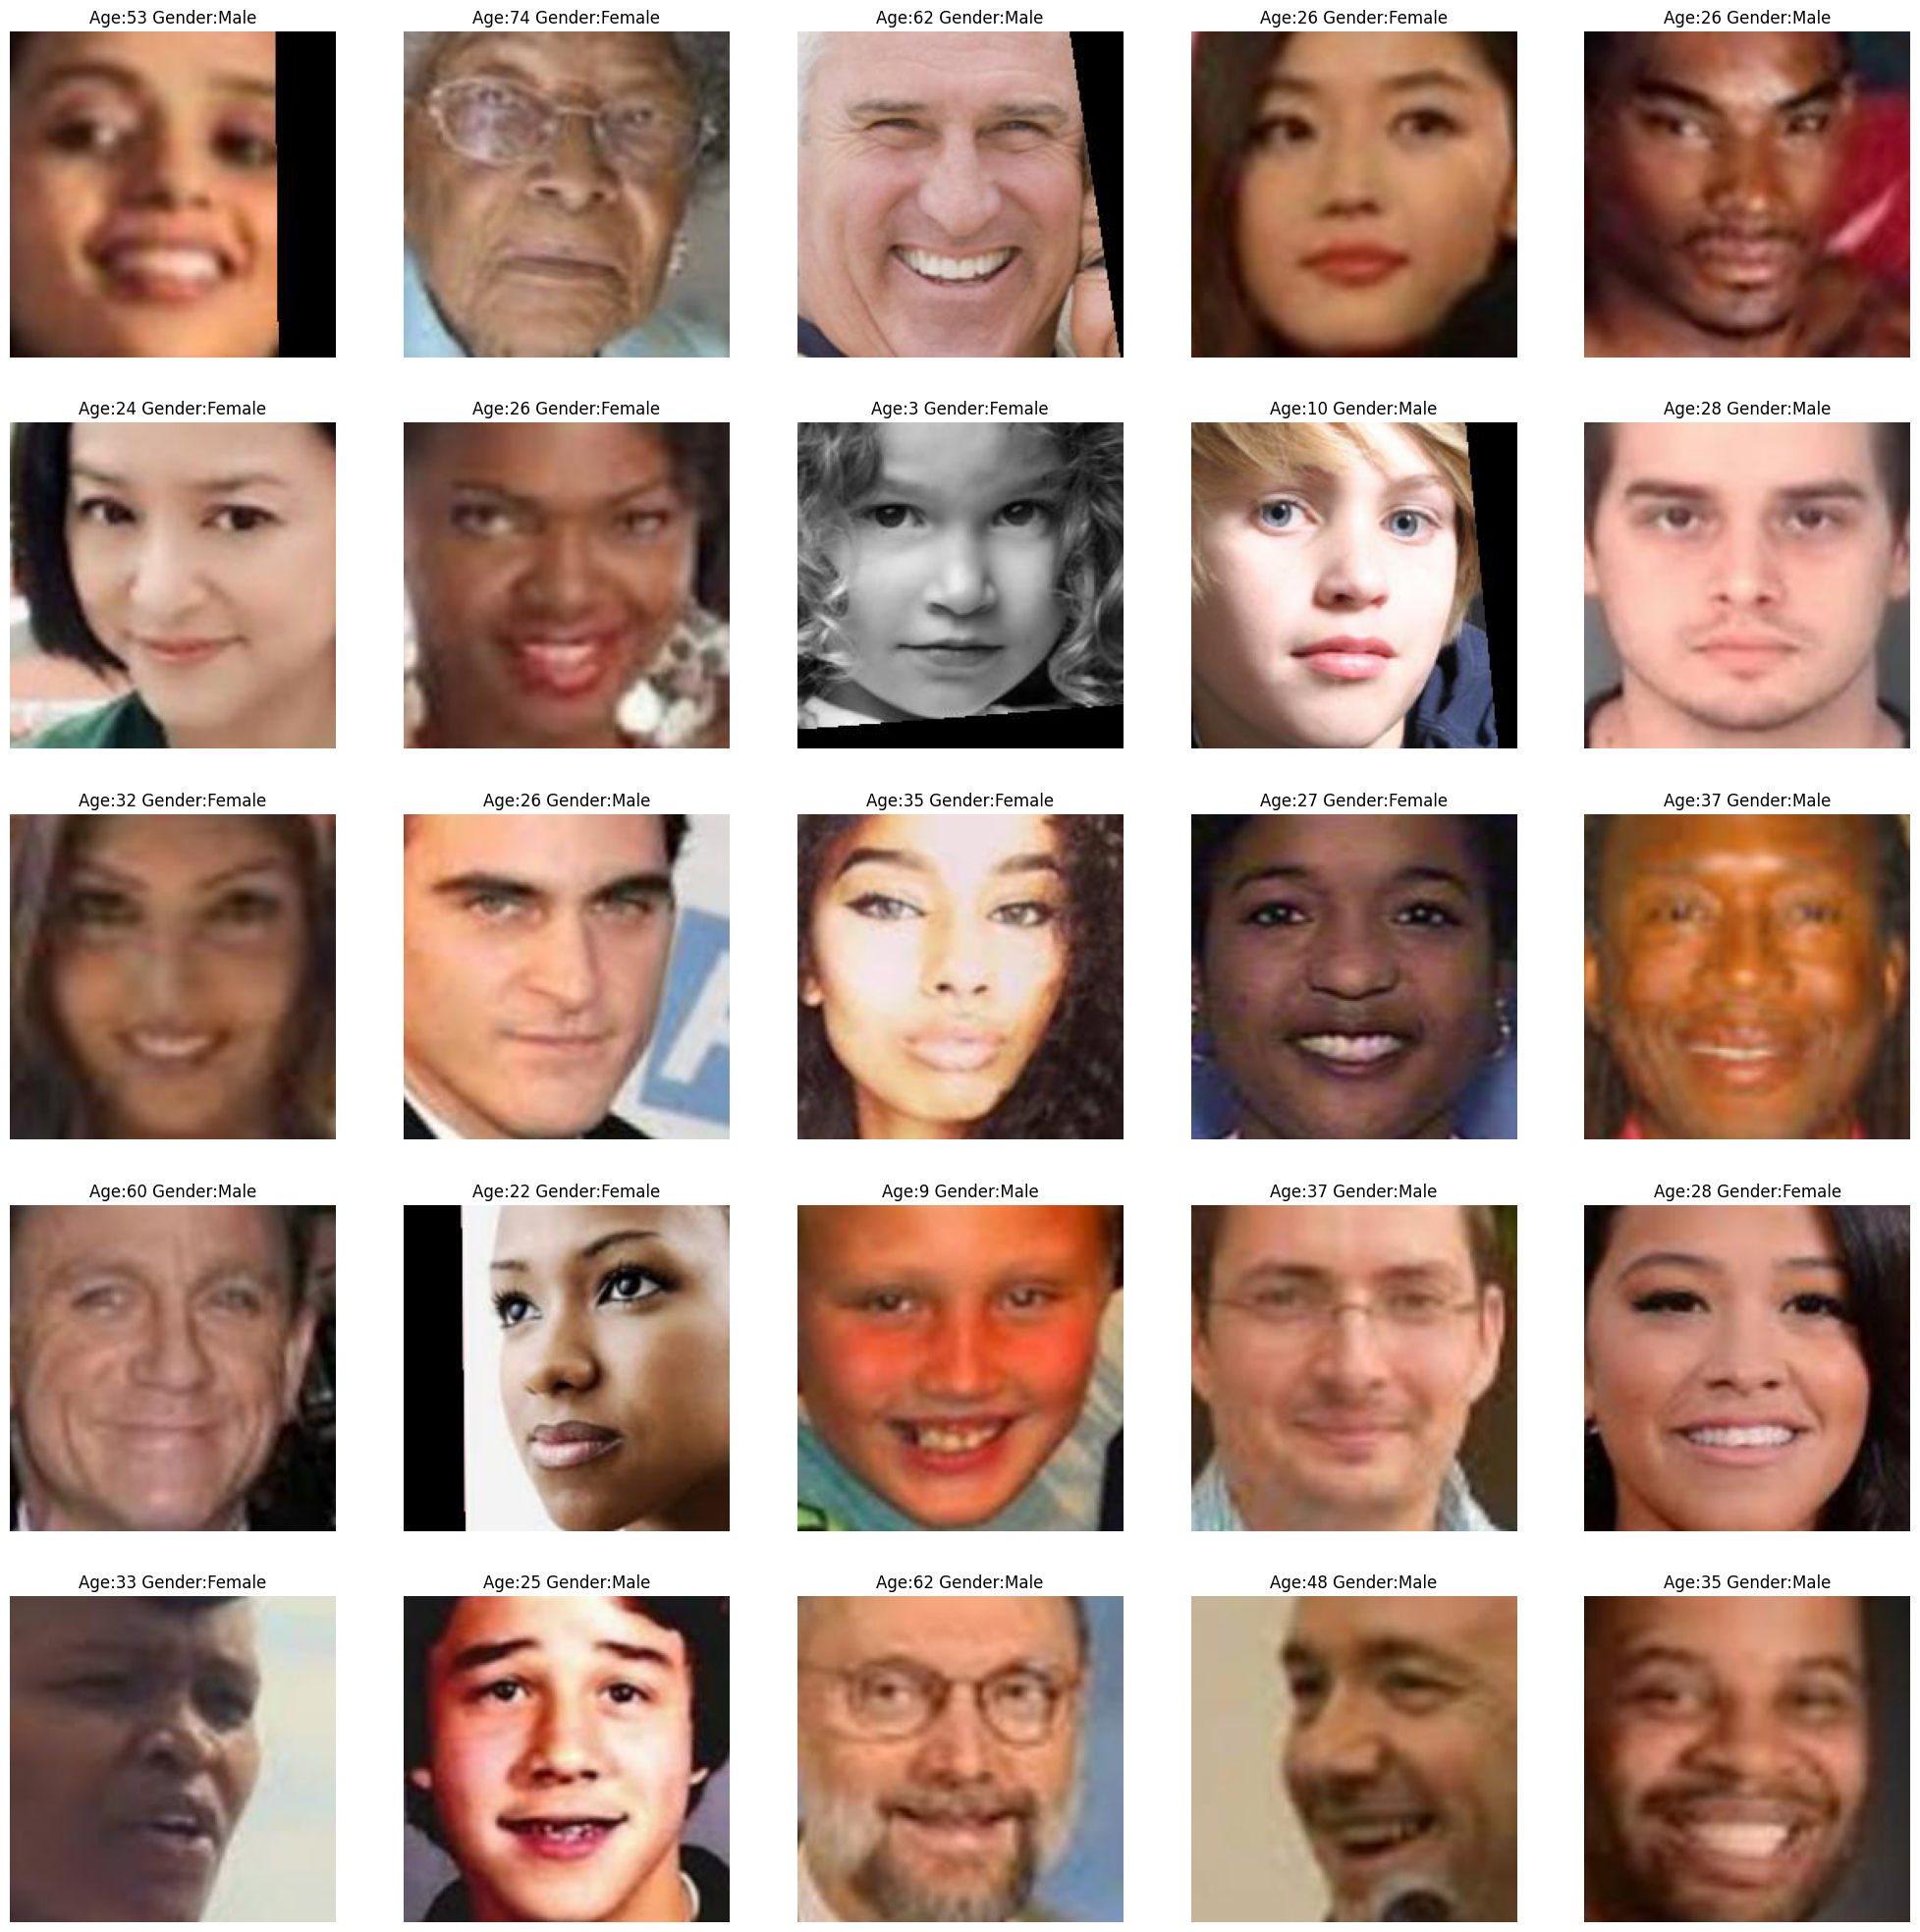

In [ ]:
#To display grid of images
plt.figure(figsize=(25,25))
files=df.iloc[0:25]

for index,file,age,gender in files.itertuples(): #Enumeration for plotting
  plt.subplot(5,5,index+1) #5 rows, 5 columns, index=1
  img=load_img(file)
  img=np.array(img)
  plt.imshow(img)
  plt.title(f'Age:{age} Gender:{gender_dict[gender]}')
  plt.axis('off') #ignore numbers for axis

In [ ]:
"""#Feature Extraction"""

def extract_features(images):
  features=[] #Feature list
  for image in tqdm(images):
    img=load_img(image,grayscale=True) #Converting to grayscale because of memory usage
    img=img.resize((128,128),Image.ANTIALIAS) #Reshaping, To avoid distortion we are using ANTIALIAS
    img=np.array(img)
    features.append(img)

  features=np.array(features) #Converting features to numpy arrays
  #Ignore this step if using RGB
  features=features.reshape(len(features),128,128,1) #Reshaping
  return features

X=extract_features(df['image']) #Extraxting Features

X.shape #Shape of data



  0%|          | 0/23708 [00:00<?, ?it/s]

(23708, 128, 128, 1)

In [ ]:
#Normalize the images
X=X/255.0 #To get pixel range in 0-1

y_gender=np.array(df['gender']) #Converting Gander into Numpy array
y_age=np.array(df['age']) # Converting age into Numpy array

input_shape=(128,128,1) #Shape of data

In [ ]:
"""#Model Creation"""

inputs=Input((input_shape))

#Convolutional Layers
#Layer 1
conv_1=Conv2D(32, kernel_size=(3,3),  activation='relu') (inputs)
maxp_1=MaxPooling2D(pool_size=(2,2)) (conv_1)

#Layer 2
conv_2=Conv2D(64, kernel_size=(3,3), activation='relu') (maxp_1)
maxp_2=MaxPooling2D(pool_size=(2,2)) (conv_2)

#Layer 3
conv_3=Conv2D(128, kernel_size=(3,3), activation='relu') (maxp_2)
maxp_3=MaxPooling2D(pool_size=(2,2)) (conv_3)

#Layer 4
conv_4=Conv2D(256, kernel_size=(3,3), activation='relu') (maxp_3)
maxp_4=MaxPooling2D(pool_size=(2,2)) (conv_4)

flatten=Flatten()(maxp_4) #coverts into 1d vector

#fully connected layers
dense_1=Dense(256, activation='relu')(flatten)
dense_2=Dense(256, activation='relu')(flatten)

dropout_1=Dropout(0.3)(dense_1)
dropout_2=Dropout(0.3)(dense_2)

output_1=Dense(1,activation='sigmoid',name='gender_out') (dropout_1)
output_2=Dense(1,activation='relu',name='age_out') (dropout_2)

model=Model(inputs=[inputs],outputs=[output_1,output_2])

model.compile(loss=['binary_crossentropy','mae'], #For Regression mae(Mean Absolute error), for classification binary_entropy
              optimizer='adam',
              metrics=['accuracy'])

#Conv2D-> Convolutional Layer
#MaxPooling2D -> Pooling Layer
#Dropout-> to prevent neural nets from overfitting
#Flatten -> Flattening the matrix -> 2D->1D
#Dense-> Connected Neural Networks
#activation-> Activation Function to improve Performance

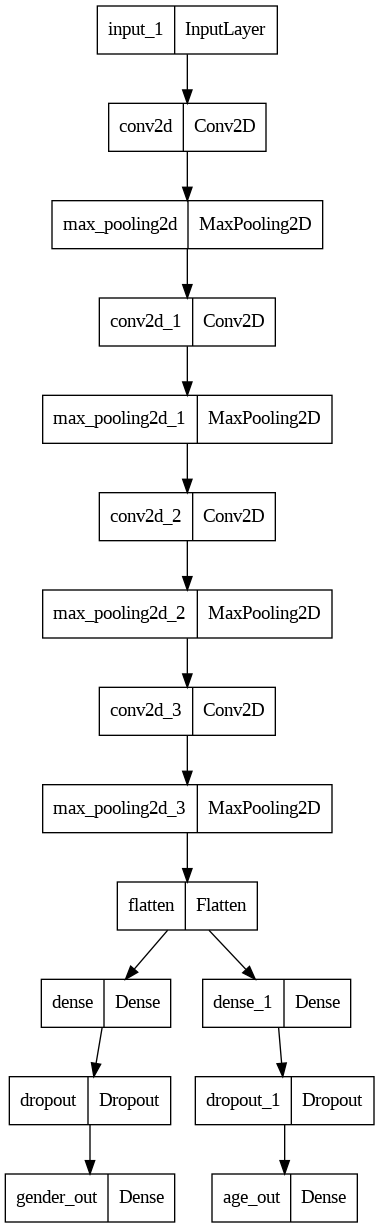

In [ ]:
#plot the model

from keras.utils import plot_model
plot_model(model)

In [ ]:
"""#Train the Model"""

history=model.fit(x=X,y=[y_gender,y_age], batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
593/593 [==============================] - 891s 1s/step - loss: 15.4893 - gender_out_loss: 0.6559 - age_out_loss: 14.8334 - gender_out_accuracy: 0.5933 - age_out_accuracy: 0.0454 - val_loss: 12.9219 - val_gender_out_loss: 0.5459 - val_age_out_loss: 12.3760 - val_gender_out_accuracy: 0.7353 - val_age_out_accuracy: 0.0428
Epoch 2/10
593/593 [==============================] - 901s 2s/step - loss: 11.4011 - gender_out_loss: 0.4753 - age_out_loss: 10.9258 - gender_out_accuracy: 0.7728 - age_out_accuracy: 0.0246 - val_loss: 9.9728 - val_gender_out_loss: 0.4304 - val_age_out_loss: 9.5423 - val_gender_out_accuracy: 0.7988 - val_age_out_accuracy: 0.0219
Epoch 3/10
593/593 [==============================] - 863s 1s/step - loss: 9.6412 - gender_out_loss: 0.4083 - age_out_loss: 9.2328 - gender_out_accuracy: 0.8127 - age_out_accuracy: 0.0150 - val_loss: 9.3213 - val_gender_out_loss: 0.3851 - val_age_out_loss: 8.9362 - val_gender_out_accuracy: 0.8311 - val_age_out_accuracy: 0.0129
Epoch 4

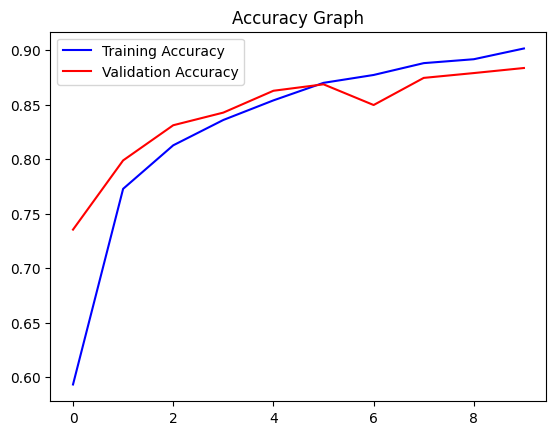

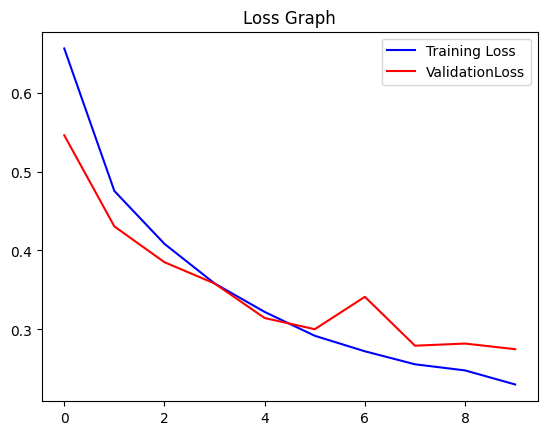

In [ ]:
"""#Plot the Results"""

#Plot Results for Gender
acc=history.history['gender_out_accuracy']
val_acc=history.history['val_gender_out_accuracy']
epochs=range(len(acc)) #Based on num of accuracy

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss=history.history['gender_out_loss']
val_loss=history.history['val_gender_out_loss']

plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='ValidationLoss')
plt.title('Loss Graph')
plt.legend()
plt.show()

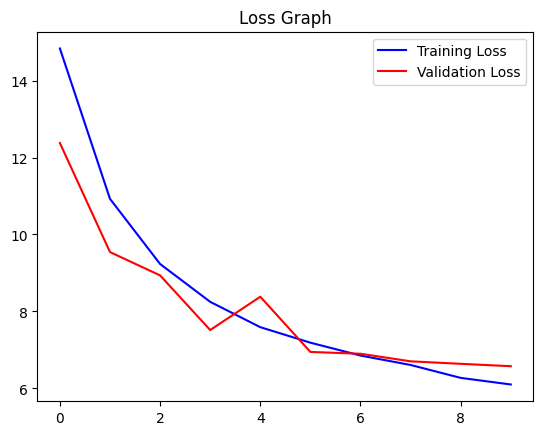

In [ ]:
#Plot Results for Age
loss=history.history['age_out_loss']
val_loss=history.history['val_age_out_loss']
epochs=range(len(loss))

plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()


Original Gender:  Female Original Age:  46
1/1 [==============================] - 0s 245ms/step
Predicted Gender:  Female Predicted Age:  55


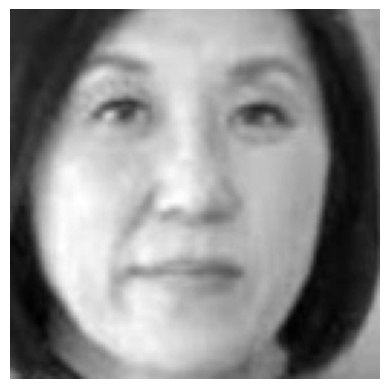

In [ ]:
"""#Prediction with Test Data"""

image_index=2350 #Index for testing
print("Original Gender: ",gender_dict[y_gender[image_index]],"Original Age: ",y_age[image_index])

#predict from model
pred=model.predict(X[image_index].reshape(1,128,128,1))
pred_gender=gender_dict[round(pred[0][0][0])]
pred_age=round(pred[1][0][0])

print("Predicted Gender: ", pred_gender,"Predicted Age: ",pred_age)
plt.axis("off")
plt.imshow(X[image_index].reshape(128,128),cmap='gray');

Original Gender:  Female Original Age:  24
1/1 [==============================] - 0s 45ms/step
Predicted Gender:  Female Predicted Age:  23


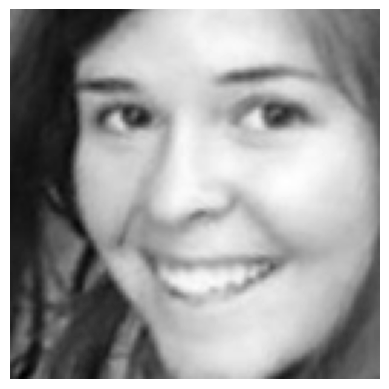

In [ ]:
image_index=3000
print("Original Gender: ",gender_dict[y_gender[image_index]],"Original Age: ",y_age[image_index])

#predict from model
pred=model.predict(X[image_index].reshape(1,128,128,1))
pred_gender=gender_dict[round(pred[0][0][0])]
pred_age=round(pred[1][0][0])

print("Predicted Gender: ", pred_gender,"Predicted Age: ",pred_age)
plt.axis("off")
plt.imshow(X[image_index].reshape(128,128),cmap='gray')

Original Gender:  Male Original Age:  45
1/1 [==============================] - 0s 35ms/step
Predicted Gender:  Male Predicted Age:  43


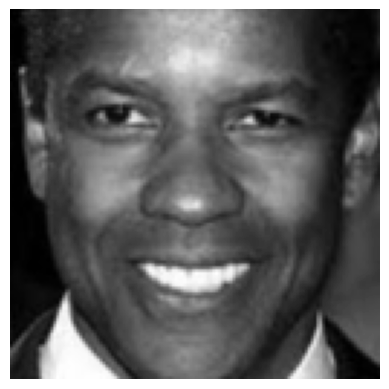

In [ ]:
image_index=1000
print("Original Gender: ",gender_dict[y_gender[image_index]],"Original Age: ",y_age[image_index])

#predict from model
pred=model.predict(X[image_index].reshape(1,128,128,1))
pred_gender=gender_dict[round(pred[0][0][0])]
pred_age=round(pred[1][0][0])

print("Predicted Gender: ", pred_gender,"Predicted Age: ",pred_age)
plt.axis("off")
plt.imshow(X[image_index].reshape(128,128),cmap='gray')
